## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from outlier_function import outlier

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results
# Combine the data into a single dataset
complete_df = pd.merge(study_results, mouse_metadata, on ='Mouse ID')
# Display the data table for preview
complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
len(complete_df['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
count=complete_df.groupby(['Mouse ID', 'Timepoint']).count()
t = count.loc[count['Drug Regimen']>1, :]
t = t.reset_index()
t


# clean_complete_df = complete_df.drop_duplicates(['Mouse ID', 'Timepoint'], keep= False)
# clean_complete_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,g989,0,2,2,2,2,2,2
1,g989,5,2,2,2,2,2,2
2,g989,10,2,2,2,2,2,2
3,g989,15,2,2,2,2,2,2
4,g989,20,2,2,2,2,2,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

x = complete_df.loc[complete_df['Mouse ID'] == t['Mouse ID'][0]]
x


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_df=complete_df.set_index('Mouse ID')
clean_complete_df= complete_df.drop(index = t['Mouse ID'][0], errors = 'ignore')
complete_df = complete_df.reset_index()

clean_complete_df=clean_complete_df.reset_index()

clean_complete_df




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_complete_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
drug_group = clean_complete_df.groupby('Drug Regimen')
regimen_summary_df = drug_group['Tumor Volume (mm3)'].describe()
regimen_summary_df['Variance'] = drug_group['Tumor Volume (mm3)'].var()
regimen_summary_df['SEM']=drug_group['Tumor Volume (mm3)'].sem()

regimen_summary_df

regimen_summary_df = regimen_summary_df.rename(columns = {'50%':'Median'})
regimen_summary_df = regimen_summary_df.drop(columns = ['25%', '75%', 'max', 'min', 'count'])
regimen_summary_df = regimen_summary_df[['mean', 'Median', 'Variance', 'std', 'SEM']]
regimen_summary_df = regimen_summary_df.rename(columns = {'mean':'Mean',
                                    'std':'Standard Deviation',})
regimen_summary_df.style.format({'Mean':'{0:,.2f}',
                                 'Median':'{0:,.2f}',
                                 'Variance':'{0:,.2f}',
                                 'Standard Deviation':'{0:,.2f}',
                                 'SEM':'{0:,.2f}'})

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

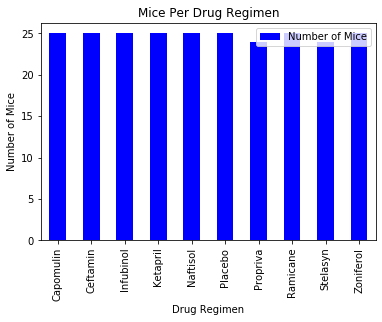

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_per_regimen = drug_group['Mouse ID'].unique()
mouse_per_regimen = mouse_per_regimen.reset_index()
unique_counts = {'Number of Mice':[len(d) for d in mouse_per_regimen['Mouse ID']]}
unique_counts=pd.DataFrame(unique_counts)

unique_counts = unique_counts.set_index(mouse_per_regimen['Drug Regimen'])
mpr_chart = unique_counts.plot(kind = 'bar', facecolor='blue')
mpr_chart.set_title('Mice Per Drug Regimen')
mpr_chart.set_ylabel('Number of Mice')


unique_counts = unique_counts.reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

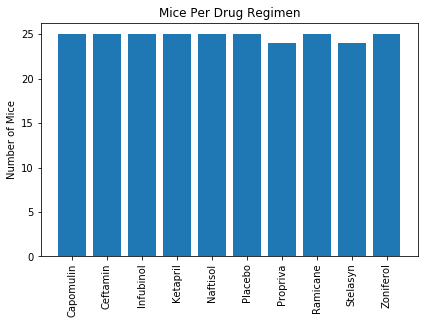

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# unique_counts = unique_counts.set_index(mouse_per_regimen['Drug Regimen'])
# unique_counts.plot(kind = 'bar', facecolor='blue')

plt.bar(unique_counts['Drug Regimen'], unique_counts['Number of Mice'])
plt.title('Mice Per Drug Regimen')
plt.ylabel('Number of Mice')
plt.tight_layout()
plt.xticks(rotation=90)



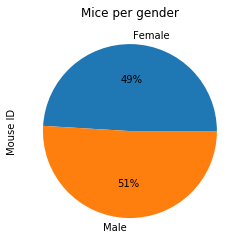

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_complete_df.groupby('Sex')
gender_count = gender_group['Mouse ID'].count()
gender_piechart = gender_count.plot(kind='pie', title = 'Mice per gender', autopct='%1.0f%%')
gender_count=gender_count.reset_index()


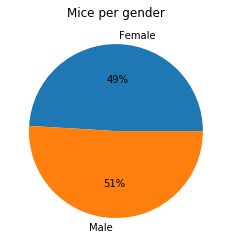

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count=pd.DataFrame(gender_count)
plt.pie(gender_count['Mouse ID'], labels=gender_count['Sex'], autopct='%1.0f%%')
plt.title('Mice per gender')
plt.show()




## Quartiles, Outliers and Boxplots

In [13]:
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
last_time_df = clean_complete_df.loc[(clean_complete_df['Timepoint'] == 45)]

#dataframe of specific drug regimen. was getting an error when I tried to use the | operator 
#when in the .loc. so i just split into different dfs and then merged later
cap = last_time_df[['Drug Regimen','Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']].loc[last_time_df['Drug Regimen']=='Capomulin']
ram = last_time_df[['Drug Regimen','Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']].loc[last_time_df['Drug Regimen']=='Ramicane']
inf = last_time_df[['Drug Regimen','Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']].loc[last_time_df['Drug Regimen']=='Infubinol']
ceft = last_time_df[['Drug Regimen','Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']].loc[last_time_df['Drug Regimen']=='Ceftamin']



In [19]:


#Created and Imported my own function to calculate outliers and relevant information.
pd.DataFrame({'Capomulin':(outlier(cap['Tumor Volume (mm3)'])),
              'Ramicane':(outlier(ram['Tumor Volume (mm3)'])),
              'Infubinol': (outlier(inf['Tumor Volume (mm3)'])),
              'Ceftamin': (outlier(ceft['Tumor Volume (mm3)']))})

,Capomulin,Ramicane,Infubinol,Ceftamin
Lower Bound,20.7046,19.6905,55.3578,52.2935
Upper Bound,51.832,49.799,75.0822,76.6679
Median,37.3118,34.8486,66.0831,64.2998
IQR,7.78186,7.52713,4.93112,6.09359
Potential Outliers,[],[],[],[]


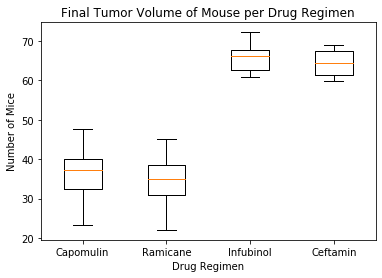

In [15]:
#Using a dictionary of lists to get boxplots on same plot.
chart_data = {'Capomulin' : [x for x in cap['Tumor Volume (mm3)']],
              'Ramicane' : [x for x in ram['Tumor Volume (mm3)']],
              'Infubinol' : [x for x in inf['Tumor Volume (mm3)']],
              'Ceftamin' : [x for x in ceft['Tumor Volume (mm3)']]}
box = plt.figure().subplots()
box.boxplot(chart_data.values(), labels = chart_data.keys(), showfliers = True)
plt.title('Final Tumor Volume of Mouse per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()

    



# Capomulin, Ramicane, Infubinol, and Ceftamin

## Line and Scatter Plots

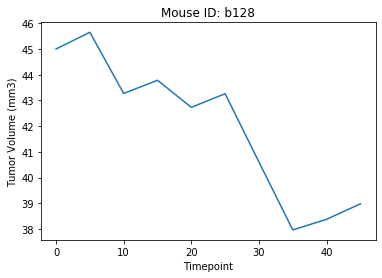

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin\
mouse_id = 'b128' #using variable to make chart dynamic for different mice 
mouse = clean_complete_df.loc[clean_complete_df['Mouse ID']==mouse_id]
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Mouse ID: {mouse_id}')
plt.show()


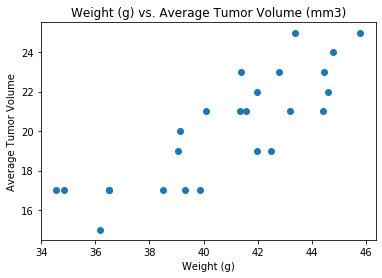

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tot_cap = clean_complete_df.loc[clean_complete_df['Drug Regimen'] == 'Capomulin']
avg_mouse_group = tot_cap.groupby('Mouse ID').mean()
plt.scatter(avg_mouse_group['Tumor Volume (mm3)'], avg_mouse_group['Weight (g)']) #since the weight doesnt change we can use the .mean() values for plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Weight (g) vs. Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
